# Оценка стоимости недвижимости с помощью нейронной сети


Чтобы запускать и редактировать код, сохраните копию этого ноутбука себе (File->Save a copy in Drive...). Свою копию вы сможете изменять и запускать.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import pandas as pd
data = pd.read_csv("/content/drive/My Drive/train.csv")

In [ ]:
!ls

drive  sample_data


In [ ]:
data

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8405,107.39,ak,s,as,c,d,aa,d,q,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,8406,108.77,j,o,t,d,d,aa,h,h,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8412,109.22,ak,v,r,a,d,aa,g,e,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,8415,87.48,al,r,e,f,d,aa,l,u,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
mcont = data.iloc[:, 10:378]

In [ ]:
mcont

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,X44,X45,X46,X47,X48,X49,X50,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


In [ ]:
mcat = data.iloc[:, 2:10]

In [ ]:
mcat

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n
...,...,...,...,...,...,...,...,...
4204,ak,s,as,c,d,aa,d,q
4205,j,o,t,d,d,aa,h,h
4206,ak,v,r,a,d,aa,g,e
4207,al,r,e,f,d,aa,l,u


преобразование текста в числовые значения

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
mcat_encoded = mcat.apply(le.fit_transform)


In [ ]:
mcat_encoded

,X0,X1,X2,X3,X4,X5,X6,X8
0,32,23,17,0,3,24,9,14
1,32,21,19,4,3,28,11,14
2,20,24,34,2,3,27,9,23
3,20,21,34,5,3,27,11,4
4,20,23,34,5,3,12,3,13
...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16
4205,31,16,40,3,3,0,7,7
4206,8,23,38,0,3,0,6,4
4207,9,19,25,5,3,0,11,20


In [ ]:
 #Среднее значение
#mmean = mcat_encoded.mean(axis=0)
 #Стандартное отклонение
#mstd = mcat_encoded.std(axis=0)
#mcat_encoded  = mcat_encoded - mmean
#mcat_encoded /= mstd


In [ ]:
X = pd.concat([mcat_encoded, mcont], axis = 1)

In [ ]:
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,...,X345,X346,X347,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


удаление повторяющихся значений

In [ ]:
X = X.drop(X.std()[(X.std() == 0)].index, axis=1)

In [ ]:
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,32,23,17,0,3,24,9,14,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,32,21,19,4,3,28,11,14,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,20,24,34,2,3,27,9,23,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,20,21,34,5,3,27,11,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,20,23,34,5,3,12,3,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4204,8,20,16,2,3,0,3,16,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4205,31,16,40,3,3,0,7,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4206,8,23,38,0,3,0,6,4,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4207,9,19,25,5,3,0,11,20,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0


нормализация значений

In [ ]:
 #Среднее значение
mmean = X.mean(axis=0)
 #Стандартное отклонение
mstd = X.std(axis=0)
X  = X - mmean
X /= mstd

In [ ]:
X

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0.162993,1.393322,-0.028118,-1.678071,0.028935,1.291964,0.751698,0.339405,-0.116108,-0.284872,4.03065,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,19.533195,-0.30857,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,-4.237357,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
1,0.162993,1.158883,0.155369,0.620896,0.028935,1.776763,1.437340,0.339405,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,11.247906,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.235940,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,1.461457,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2,-0.710475,1.510542,1.531527,-0.528587,0.028935,1.655563,0.751698,1.618197,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,11.423670,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.09287,-0.151122,-0.223329,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,11.423670,-0.04081,-0.021801,-0.037778
3,-0.710475,1.158883,1.531527,1.195637,0.028935,1.655563,1.437340,-1.081476,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.09287,-0.151122,-0.223329,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,45.858481,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
4,-0.710475,1.393322,1.531527,1.195637,0.028935,-0.162435,-1.305229,0.197316,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,5.451199,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.09287,-0.151122,-0.223329,0.235940,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0

In [ ]:
#X = X.dropna(axis='columns')

In [ ]:
#X

In [ ]:
#nunique = X.apply(pd.Series.nunique)
#cols_to_drop = nunique[nunique == 1].index
#X.drop(cols_to_drop, axis=1)

In [ ]:
#X

In [ ]:
Y = data.iloc[:, 1]

In [ ]:
Y

0       130.81
1        88.53
2        76.26
3        80.62
4        78.02
         ...  
4204    107.39
4205    108.77
4206    109.22
4207     87.48
4208    110.85
Name: y, Length: 4209, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [ ]:
X_train

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
2218,-1.583943,1.393322,1.898502,-0.528587,0.028935,0.201165,-1.305229,-0.513124,-0.116108,3.509515,4.03065,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,3.473983,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
1688,-0.928842,0.221127,-0.119862,0.046154,0.028935,-1.132034,1.094519,-0.086860,-0.116108,-0.284872,-0.24804,1.155604,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,1.981827,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,-1.041363,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,7.137987,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2242,0.599727,-0.833849,-0.119862,-0.528587,0.028935,0.201165,0.751698,1.191933,-0.116108,-0.284872,-0.24804,1.155604,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,2.135187,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
582,1.109250,-0.130532,-0.119862,0.046154,0.028935,-0.647234,0.751698,-0.939388,-0.116108,-0.284872,-0.24804,1.155604,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,9.309506,-0.015414,-0.278981,...,-0.09287,-0.151122,4.476632,0.23594,-0.216803,-0.715734,-0.650246,4.178083,-0.046286,-0.504465,1.276164,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,0.960051,0.571338,-0.053465,-0.053465,-0.034483,4.278199,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,1.475156,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2132,0.890883,1.276103,-0.119862,-0.528587,0.028935,0.322365,0.751698,1.760285,-0.116108,-0.284872,-0.24804,1.155604,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.30857,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,1.396835,1.537513,-0.239287,-0.0462

In [ ]:
y_train

2218    113.55
1688    106.66
2242    115.18
582      92.29
2132     97.58
         ...  
3444    109.42
466      78.25
3092     92.18
3772     91.92
860      87.71
Name: y, Length: 2820, dtype: float64

In [ ]:
!pip install -q -U keras-tuner

     |████████████████████████████████| 97 kB 4.6 MB/s 


In [ ]:
%tensorflow_version 2.x
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils
from google.colab import files
from kerastuner.tuners import RandomSearch, Hyperband, BayesianOptimization
import numpy as np

Подготовка данных окончена

In [ ]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(1))

In [ ]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               46720     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 46,849
Trainable params: 46,849
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [ ]:
model.fit(X_train, y_train, epochs=100, batch_size=100, verbose=2)

Результаты исходной модели

In [ ]:
predicted_y_tuner = model.predict(X_test)
predicted_y_tuner = [elem[0] for elem in predicted_y_tuner]
err = np.mean(abs(predicted_y_tuner - y_test))
print(err)
CC_tuner = np.corrcoef(predicted_y_tuner, y_test)
print(CC_tuner[0][1])

7.277549020277687
0.41613908680849987


Изменение количества эпох и размера выборки результатов не дали: Коэффициет корреляции +-0.4 на тестовой; Средняя ошибка +-7.2

In [ ]:
def build_model(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=128, # минимальное количество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  
  return model

In [ ]:
rm -Rf /content/test_directory

In [ ]:
!ls /content

drive  sample_data


In [ ]:
tuner = RandomSearch(
  build_model, # функция создания модели
  objective='val_mae', # метрика, которую нужно оптимизировать   доля правильных ответов на проверочном наборе данных
  max_trials=5, # максимальное количество запусков обучения
  directory='test_directory' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 1
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 1024, 'step': 32, 'sampling': None}


In [ ]:
tuner.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=100, # Размер мини-выборки
             epochs=100, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=2,)

Trial 5 Complete [00h 00m 14s]
val_mae: 6.451901912689209

Best val_mae So Far: 6.368649005889893
Total elapsed time: 00h 01m 17s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner.results_summary()

In [ ]:
models = tuner.get_best_models(num_models=3)

Результаты первой модели

In [ ]:
for model in models:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
for model in models:
  predicted_y_tuner = model.predict(X_test)
  predicted_y_tuner = [elem[0] for elem in predicted_y_tuner]
  err = np.mean(abs(predicted_y_tuner - y_test))
  print(err)
  CC_tuner = np.corrcoef(predicted_y_tuner, y_test)
  print(CC_tuner[0][1])

7.136353345009999
0.4740886553686825
7.199875535051808
0.4535879635916347
7.276668276541359
0.4533812966340817


Изменение количества эпох и размера выборки результатов не дали:
  Коэффициет корреляции +-0.4 на тестовой;
  Средняя ошибка +-7.1

In [ ]:
def build_model2(hp):
  model = Sequential()

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
    min_value=512, # минимальное кол ичество нейронов - 128
    max_value=1024, # максимальное количество - 1024
    step=32), input_shape=(X_train.shape[1],), activation='relu'))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation='relu'))
  
  model.add(Dense(1))

  model.compile(optimizer="adam", loss='mse', metrics=['mae'])
  return model

In [ ]:
rm -Rf /content/test_directory2

In [ ]:
!ls /content

drive  sample_data  test_directory


In [ ]:
tuner2 = BayesianOptimization(
  build_model2, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory2' # каталог, куда сохраняются обученные сети
)

In [ ]:
tuner2.search_space_summary()

Search space summary
Default search space size: 2
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}


In [ ]:
tuner2.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=100, # Размер мини-выборки
             epochs=32, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=2,)

Trial 5 Complete [00h 00m 08s]
val_mae: 5.9619364738464355

Best val_mae So Far: 5.813846111297607
Total elapsed time: 00h 00m 44s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner2.results_summary()

In [ ]:
models2 = tuner2.get_best_models(num_models=3)

Результаты второй модели

In [ ]:
for model in models2:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
for model in models2:
  predicted_y_tuner = model.predict(X_test)
  predicted_y_tuner = [elem[0] for elem in predicted_y_tuner]
  err = np.mean(abs(predicted_y_tuner - y_test))
  print(err)
  CC_tuner = np.corrcoef(predicted_y_tuner, y_test)
  print(CC_tuner[0][1])

6.27863752745484
0.6381541068599594
6.32220350689816
0.6303879145771104
6.315755500985712
0.6463379839966734


Изменение количества эпох и размера выборки результатов не дали: Коэффициет корреляции +-0.63 на тестовой; Средняя ошибка +-6.3

In [ ]:
def build_model3(hp):
  model = Sequential()

  activation_choice = hp.Choice('activation', values=['relu', 'sigmoid', 'tanh', 'elu', 'selu'])

  model.add(Dense(units=hp.Int('units_input', # Полносвязный слой с разным количеством нейронов
                               min_value=512, # минимальное количество нейронов - 128
                               max_value=1024, # максимальное количество - 1024
                               step=32), input_shape=(X_train.shape[1],), activation=activation_choice))
  
  model.add(Dense(units=hp.Int('units_hidden', min_value=128, max_value=600, step=32), activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  return model

In [ ]:
rm -Rf /content/test_directory3

In [ ]:
!ls /content

drive  sample_data  test_directory  test_directory2  test_directory4


In [ ]:
tuner3 = BayesianOptimization(
  build_model3, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory3' # каталог, куда сохраняются обученные сети
)

In [ ]:
#!free -h

In [ ]:
tuner3.search_space_summary()

Search space summary
Default search space size: 4
activation (Choice)
{'default': 'relu', 'conditions': [], 'values': ['relu', 'sigmoid', 'tanh', 'elu', 'selu'], 'ordered': False}
units_input (Int)
{'default': None, 'conditions': [], 'min_value': 512, 'max_value': 1024, 'step': 32, 'sampling': None}
units_hidden (Int)
{'default': None, 'conditions': [], 'min_value': 128, 'max_value': 600, 'step': 32, 'sampling': None}
optimizer (Choice)
{'default': 'adam', 'conditions': [], 'values': ['adam', 'rmsprop', 'SGD'], 'ordered': False}


In [ ]:
tuner3.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=32, # Размер мини-выборки
             epochs=100, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=2,)

Trial 5 Complete [00h 00m 42s]
val_mae: 6.537889003753662

Best val_mae So Far: 6.91732931137085
Total elapsed time: 00h 04m 04s
INFO:tensorflow:Oracle triggered exit


In [ ]:
tuner3.results_summary()

In [ ]:
models3 = tuner3.get_best_models(num_models=2)

Результаты третьей модели

In [ ]:
for model in models3:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 992)               362080    
_________________________________________________________________
dense_1 (Dense)              (None, 288)               285984    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 289       
Total params: 648,353
Trainable params: 648,353
Non-trainable params: 0
_________________________________________________________________
44/44 [==============================] - 0s 3ms/step - loss: 522.8520 - mae: 8.1805

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 608)               221920    
_________________________________________________________________
dense_1 (De

In [ ]:
for model in models3:
  predicted_y_tuner = model.predict(X_test)
  predicted_y_tuner = [elem[0] for elem in predicted_y_tuner]
  err = np.mean(abs(predicted_y_tuner - y_test))
  print(err)
  CC_tuner = np.corrcoef(predicted_y_tuner, y_test)
  print(CC_tuner[0][1])

8.180490557874517
0.2469348028320507
8.213678799859926
0.3886513809443185


Изменение количества эпох и размера выборки результатов не дали: Коэффициет корреляции +-0.6 на тестовой; Средняя ошибка +-6.9

In [ ]:
def build_model4(hp):

  model = Sequential()

  activation_choice = hp.Choice("activation", values=['relu', 'selu', 'elu'])
  
  model.add(Dense(units=hp.Int("units_input", min_value=32,
                               max_value=1024,
                               step=32),
                  activation=activation_choice, 
                  input_shape=(X_train.shape[1], )))
  
  model.add(Dropout(0.3))

  for i in range(hp.Choice('hidden_layers', values=[1,2,3])):
    model.add(Dense(units=hp.Int(f'layer_{i}_units_',
                                 min_value=32//(i+1),
                                 max_value=512//(i+1), 
                                 step=64//(i+1)),
                     activation=activation_choice))
  
  model.add(Dense(1))

  model.compile(optimizer=hp.Choice('optimizer', values=['adam','rmsprop','SGD']), loss='mse', metrics=['mae'])

  model.summary()
  return model

In [ ]:
rm -Rf /content/test_directory4

In [ ]:
!ls /content

drive  sample_data  test_directory  test_directory2  test_directory3


In [ ]:
tuner4 = BayesianOptimization(
  build_model4, # функция создания модели
  objective ='val_mae', # метрика, которую нужно оптимизировать
  max_trials = 5, # максимальное количество запусков обучения
  directory ='test_directory4' # каталог, куда сохраняются обученные сети
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                11680     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 12,769
Trainable params: 12,769
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tuner4.search(X_train, # Данные для обучения
             y_train, # Данные для обучения
             batch_size=100, # Размер мини-выборки
             epochs=100, # Количество эпох обучения
             validation_split=0.2, # Часть данных, которая будет использоваться для проверки
            verbose=1,)

Trial 5 Complete [00h 00m 21s]
val_mae: nan

Best val_mae So Far: 5.947004318237305
Total elapsed time: 00h 02m 37s
INFO:tensorflow:Oracle triggered exit


In [ ]:
models4 = tuner4.get_best_models(num_models=3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 896)               327040    
_________________________________________________________________
dropout (Dropout)            (None, 896)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 416)               373152    
_________________________________________________________________
dense_2 (Dense)              (None, 16)                6672      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                170       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 707,045
Trainable params: 707,045
Non-trainable params: 0
__________________________________________________

Результаты четввертой модели

In [ ]:
for model in models4:
  model.summary()
  model.evaluate(X_test, y_test)
  print() 

In [ ]:
for model in models4:
  predicted_y_tuner = model.predict(X_test)
  predicted_y_tuner = [elem[0] for elem in predicted_y_tuner]
  err = np.mean(abs(predicted_y_tuner - y_test))
  print(err)
  CC_tuner = np.corrcoef(predicted_y_tuner, y_test)
  print(CC_tuner[0][1])

6.527446780112083
0.6273980463981512
6.513257439697795
0.5786200674028774
8.765111502166098
0.440281531978239


Изменение количества эпох и размера выборки результатов не дали: Коэффициет корреляции +-0.62 на тестовой; Средняя ошибка +-6.5

Модель с лучшими параметрами находится в tuner2

In [ ]:
best_params = tuner2.get_best_hyperparameters()[0]
best_model = tuner2.hypermodel.build(best_params)
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 800)               292000    
_________________________________________________________________
dense_1 (Dense)              (None, 416)               333216    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 417       
Total params: 625,633
Trainable params: 625,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
best_model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=0.2)

Epoch 1/100
23/23 [==============================] - 1s 19ms/step - loss: 4219.2598 - mae: 55.5012 - val_loss: 896.5094 - val_mae: 25.1415
Epoch 2/100
23/23 [==============================] - 0s 10ms/step - loss: 426.9262 - mae: 15.4626 - val_loss: 160.6764 - val_mae: 9.2275
Epoch 3/100
23/23 [==============================] - 0s 10ms/step - loss: 112.8578 - mae: 7.6376 - val_loss: 107.8145 - val_mae: 6.9034
Epoch 4/100
23/23 [==============================] - 0s 10ms/step - loss: 69.8920 - mae: 5.7757 - val_loss: 92.3791 - val_mae: 6.5191
Epoch 5/100
23/23 [==============================] - 0s 11ms/step - loss: 59.0167 - mae: 5.3213 - val_loss: 89.3507 - val_mae: 6.3760
Epoch 6/100
23/23 [==============================] - 0s 11ms/step - loss: 52.9719 - mae: 4.9790 - val_loss: 87.8704 - val_mae: 6.1853
Epoch 7/100
23/23 [==============================] - 0s 11ms/step - loss: 51.1772 - mae: 4.8746 - val_loss: 85.5794 - val_mae: 6.2477
Epoch 8/100
23/23 [==============================] -

In [ ]:
X_test

,X0,X1,X2,X3,X4,X5,X6,X8,X10,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23,X24,X26,X27,X28,X29,X30,X31,X32,X33,X34,X35,X36,X37,X38,X39,X40,X41,X42,X43,...,X344,X345,X346,X348,X349,X350,X351,X352,X353,X354,X355,X356,X357,X358,X359,X360,X361,X362,X363,X364,X365,X366,X367,X368,X369,X370,X371,X372,X373,X374,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
1073,-1.511154,0.572786,-0.945557,1.195637,0.028935,-0.889634,0.751698,-0.086860,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,3.007191,-0.408087,-0.051183,-0.308570,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,0.960051,-1.749861,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,1.843180,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
144,-0.200952,0.221127,-1.312532,1.195637,0.028935,-0.041235,0.408877,1.476109,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,2.449878,-0.051183,-0.308570,-0.145263,-0.043633,-0.070803,-1.466267,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,1.396835,-0.650246,-0.239287,-0.046286,-0.504465,-0.783412,-0.468232,-0.034483,1.158412,-0.181316,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,1.843180,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
2380,0.090204,-1.185508,0.338857,-0.528587,0.028935,0.564764,1.437340,0.339405,8.610638,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,-0.408087,-0.051183,-0.308570,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,-0.715734,-0.650246,-0.239287,-0.046286,-0.504465,1.276164,-0.468232,-0.034483,-0.863046,-0.181316,-0.287786,0.187514,0.960051,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,1.461457,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,-0.087517,-0.04081,-0.021801,-0.037778
184,-0.710475,1.627761,0.430601,-0.528587,0.028935,-0.041235,0.751698,-0.086860,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,11.423670,-0.088884,-0.332457,-0.408087,-0.051183,-0.308570,-0.145263,-0.043633,14.120240,0.681842,-0.183402,4.716869,-0.067331,1.817387,-0.106254,-0.015414,-0.074116,1.817387,-0.067331,1.817387,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,3.583621,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,1.396835,1.537513,-0.239287,-0.046286,1.981827,1.276164,-0.468232,-0.034483,-0.863046,5.513912,-0.287786,0.187514,-1.041363,0.571338,-0.053465,-0.053465,-0.034483,-0.233688,-0.258659,-0.021801,-0.081825,-0.120241,-0.021801,-0.140062,-0.542412,-0.684086,-0.246417,-0.677733,-0.145263,-0.097941,-0.090232,11.423670,-0.04081,-0.021801,-0.037778
2587,-1.583943,1.393322,-0.853813,0.046154,0.028935,0.443565,0.408877,0.765669,-0.116108,-0.284872,-0.24804,-0.865143,-0.021801,-0.051183,-0.087517,-0.088884,-0.332457,2.449878,-0.051183,-0.308570,-0.145263,-0.043633,-0.070803,0.681842,-0.183402,-0.211955,-0.067331,-0.550110,-0.106254,-0.015414,-0.074116,-0.550110,-0.067331,-0.550110,-0.185468,-0.015414,-0.026704,-0.107392,-0.015414,-0.278981,...,-0.09287,-0.151122,-0.223329,0.23594,-0.216803,-0.715734,-0.650246,-0.239287,-0

In [ ]:
y_test

1073     97.94
144      96.41
2380    105.83
184      79.09
2587    108.69
         ...  
2282     90.36
2986    108.19
1078     90.09
1413    109.12
2696    116.07
Name: y, Length: 1389, dtype: float64

In [ ]:
#Корреляция новой модели 
predicted_y_tuner = best_model.predict(X_test)
predicted_y_tuner = np.round(predicted_y_tuner, 0)

predicted_y_tuner = np.reshape(predicted_y_tuner, (predicted_y_tuner.shape[0]))

СС_tuner = np.corrcoef(predicted_y_tuner, y_test)
СС_tuner = СС_tuner[0][1]
print(f'Коэффициент корреляции с истинными данными: {СС_tuner}')

Коэффициент корреляции с истинными данными: 0.5668338951219529


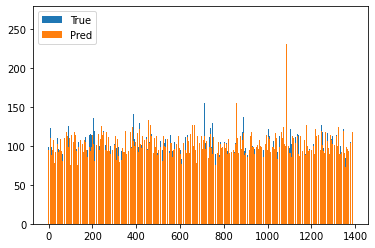

In [ ]:
from matplotlib import pyplot as plt
y_test = y_test.reset_index(drop=True)

x = np.arange(0, len(y_test))

plt.bar(x, y_test, label = 'True')
plt.bar(x, predicted_y_tuner, label = 'Pred')
plt.legend()

In [ ]:
#pred = model.predict(X_test)

Предсказание

In [ ]:
print(predicted_y_tuner)

[ 94.  95. 117. ... 100. 117. 104.]


In [ ]:
#pred = [elem[0] for elem in predicted_y_tuner]

In [ ]:
err = np.mean(abs(predicted_y_tuner - y_test))
print(err)

7.712951763858897


In [ ]:
#fig, axs = plt.subplots(1, 2)
#axs[0].hist(pred, len(pred))
#axs[0].set_title('pred')
#axs[1].hist(y_test, len(y_test))
#axs[1].set_title('y_test')
#axs[0].set_xlim(0, 200)
#axs[1].set_xlim(0, 200)

Коэффициент корреляции

In [ ]:
#CC_tuner = np.corrcoef(pred, y_test)

In [ ]:
#CC_tuner[0][1]